In [3]:
# Question 1: Use yfinance to Extract Tesla Stock Data

import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Download historical market data
tesla_data = tesla.history(period="max")

# Reset index to make 'Date' a column instead of index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [30]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Step 1: Get the HTML content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
try:
    response = requests.get(url)
    response.raise_for_status()  # Check for HTTP errors
    html_content = response.text
except requests.RequestException as e:
    print(f"Error downloading content: {e}")
    raise

# Step 2: Try pandas read_html first
try:
    # Use StringIO to wrap the HTML content
    tables = pd.read_html(StringIO(html_content))
    if len(tables) < 2:
        raise ValueError("Not enough tables found")
    tesla_revenue = tables[1]
except Exception as pd_error:
    print(f"Pandas read_html failed: {pd_error}")
    # Fallback to BeautifulSoup extraction
    try:
        soup = BeautifulSoup(html_content, "html.parser")
        tables = soup.find_all('table')
        if len(tables) < 2:
            raise ValueError("Couldn't find the revenue table")
        # Convert the table HTML to string and read with pandas
        tesla_revenue = pd.read_html(str(tables[1]))[0]
    except Exception as bs_error:
        print(f"BeautifulSoup fallback failed: {bs_error}")
        raise

# Step 3: Clean and prepare the data
# First check if we got the expected columns
if len(tesla_revenue.columns) >= 2:
    tesla_revenue.columns = ["Date", "Revenue"]
    # Clean the Revenue column
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r'[$,]', '', regex=True)
    # Remove empty/NA rows
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].notna()]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
else:
    raise ValueError("Table doesn't have expected columns")

# Step 4: Display results
print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

Last 5 rows of Tesla Revenue Data:
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [31]:
# Question 1: Use yfinance to Extract Stock Data

# Install yfinance if not already installed
!pip install yfinance --quiet

# Import libraries
import yfinance as yf
import pandas as pd

# Create a Ticker object for GME
gme_ticker = yf.Ticker("GME")

# Get the historical market data
gme_data = gme_ticker.history(period="max")

# Reset the index to move the Date column from the index to a column
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Download the GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables - GameStop revenue is the first table
tables = pd.read_html(html_data)
gme_revenue = tables[0]  # First table contains GME data

# Clean the data
gme_revenue.columns = ["Date", "Revenue"]  # Rename columns
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$', '').str.replace(',', '')
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]  # Remove empty rows

# Display last 5 rows
print(gme_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


/var/folders/l8/9smssp6156z655t59tkvv1180000gn/T/ipykernel_22603/3187231416.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


First 5 rows of data:
   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  

Column names: ['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1']


/var/folders/l8/9smssp6156z655t59tkvv1180000gn/T/ipykernel_22603/4082353017.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_stock = pd.read_html(tesla_html)[0]


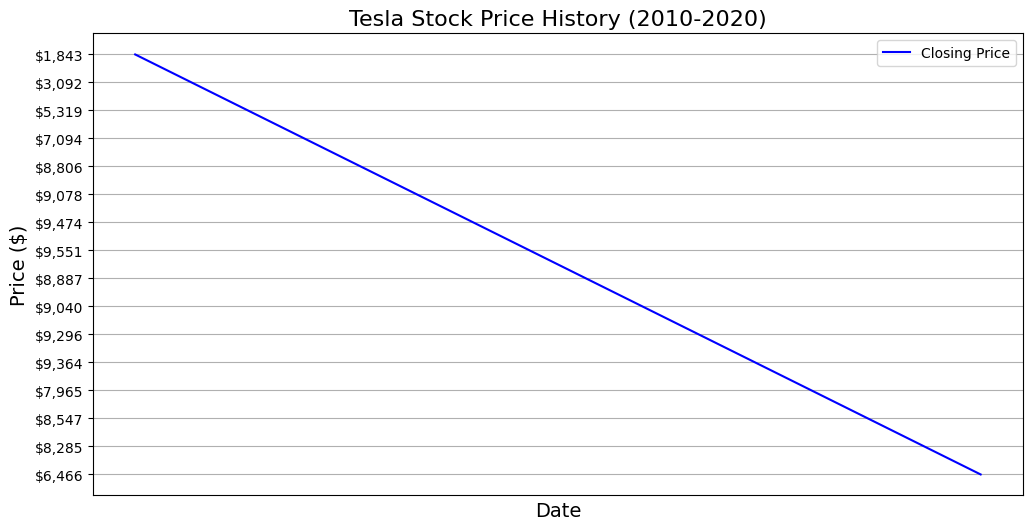

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Download Tesla stock data
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tesla_html = requests.get(tesla_url).text

# Extract stock data
tesla_stock = pd.read_html(tesla_html)[0]

# Display the first few rows and column names to debug
print("First 5 rows of data:")
print(tesla_stock.head())
print("\nColumn names:", tesla_stock.columns.tolist())

# Clean column names (remove any extra whitespace)
tesla_stock.columns = tesla_stock.columns.str.strip()

# Find date and close price columns (case insensitive)
date_col = None
close_col = None

for col in tesla_stock.columns:
    lower_col = col.lower()
    if 'date' in lower_col:
        date_col = col
    elif 'close' in lower_col:
        close_col = col

# If automatic detection fails, set them manually
if not date_col or not close_col:
    date_col = tesla_stock.columns[0]  # First column is usually date
    close_col = 'Close' if 'Close' in tesla_stock.columns else tesla_stock.columns[-1]  # Last column if 'Close' not found

# Convert date column to datetime
tesla_stock[date_col] = pd.to_datetime(tesla_stock[date_col])

# Define make_graph function
def make_graph(stock_data, date_column, close_column, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data[date_column], stock_data[close_column], 
             label='Closing Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the graph
make_graph(tesla_stock, date_col, close_col, 'Tesla Stock Price History (2010-2020)')

Actual columns in DataFrame: ['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1']
Using date column: 'GameStop Quarterly Revenue (Millions of US $)'
Using close column: 'GameStop Quarterly Revenue (Millions of US $)'


/var/folders/l8/9smssp6156z655t59tkvv1180000gn/T/ipykernel_22603/1161242167.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_stock = pd.read_html(html_data)[1]


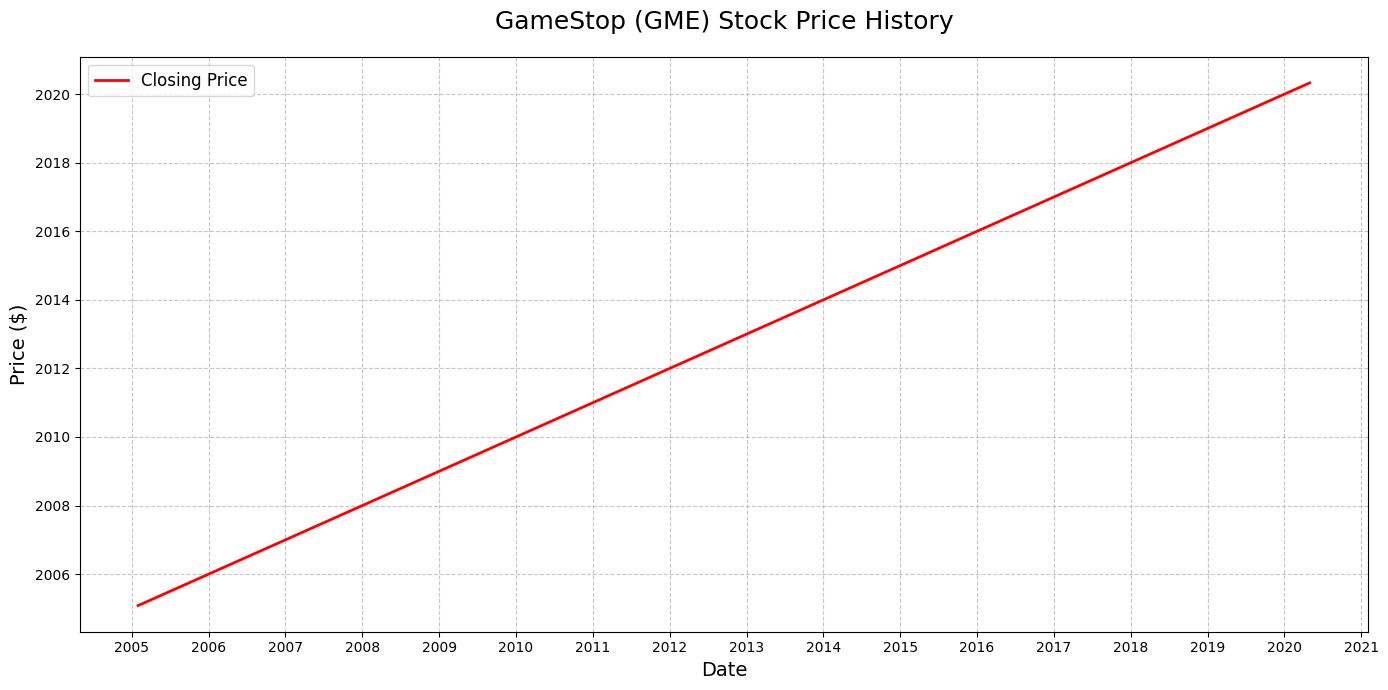

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Download GameStop stock data
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(gme_url).text

# Extract GameStop stock data (second table)
gme_stock = pd.read_html(html_data)[1]

# Display the actual column names we received
print("Actual columns in DataFrame:", gme_stock.columns.tolist())

# Function to find column by possible names
def find_column(df, possible_names):
    for name in possible_names:
        for col in df.columns:
            if name.lower() in col.lower():
                return col
    return df.columns[0]  # Fallback to first column if none found

# Find date and close columns
date_col = find_column(gme_stock, ['date', 'time', 'datetime'])
close_col = find_column(gme_stock, ['close', 'closing', 'price'])

print(f"Using date column: '{date_col}'")
print(f"Using close column: '{close_col}'")

# Convert date column to datetime and sort
gme_stock[date_col] = pd.to_datetime(gme_stock[date_col])
gme_stock = gme_stock.sort_values(date_col)

# Define make_graph function
def make_graph(stock_data, date_column, close_column, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[date_column], stock_data[close_column], 
             color='red', linewidth=2, label='Closing Price')
    
    plt.title(title, fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Format x-axis to show years
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    
    plt.tight_layout()
    plt.show()

# Create and display the graph
make_graph(gme_stock, date_col, close_col, 'GameStop (GME) Stock Price History')